In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [4]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [7]:
df.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [10]:
# Replace with mean
df['rating'].fillna(df['rating'].mean(), inplace=True)


<ipython-input-10-ad3fc3bd18ae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(df['rating'].mean(), inplace=True)


In [11]:
# Convert the 'episodes' column to numeric, handling errors by coercing them to NaN
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')

# Replace NaN values with the median of the numeric 'episodes' column
df['episodes'].fillna(df['episodes'].median(), inplace=True)

<ipython-input-11-3d2b3ed44cbc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['episodes'].fillna(df['episodes'].median(), inplace=True)


In [14]:
# Replace with most frequent value
df['type'].fillna(df['type'].mode()[0], inplace=True)

# Replace with 'Unknown'
df['genre'].fillna('Unknown', inplace=True)

<ipython-input-14-7abcde8c5907>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].fillna('Unknown', inplace=True)


In [15]:
df.dropna(inplace=True)

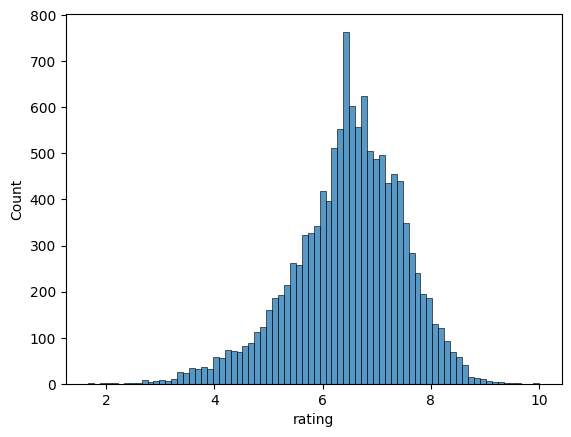

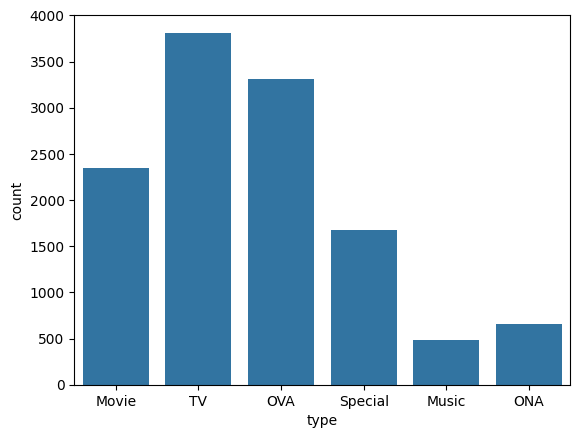

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['rating'])  # Histogram of 'Rating'
plt.show()

sns.countplot(x='type', data=df)  # Bar plot of 'Type' frequencies
plt.show()

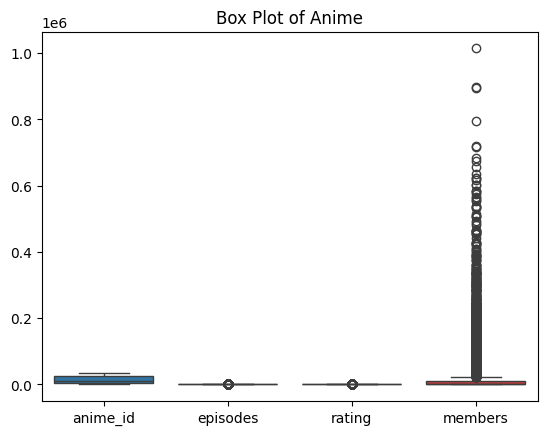

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df)
plt.title('Box Plot of Anime')
plt.show()

In [24]:
# Calculate the IQR (Interquartile Range)
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter the dataframe to remove outliers
df_no_outliers = df[(df['rating'] >= lower_bound) & (df['rating'] <= upper_bound)]

In [21]:
Q1 = df['members'].quantile(0.25)
Q3 = df['members'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter the dataframe to remove outliers
df_no_outliers = df[(df['members'] >= lower_bound) & (df['members'] <= upper_bound)]

In [22]:
Q1 = df['episodes'].quantile(0.25)
Q3 = df['episodes'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter the dataframe to remove outliers
df_no_outliers = df[(df['episodes'] >= lower_bound) & (df['episodes'] <= upper_bound)]

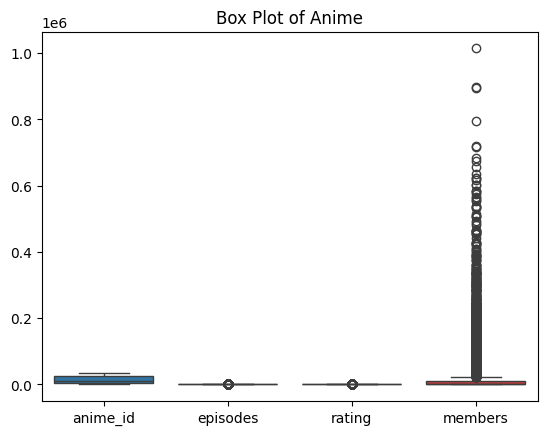

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df)
plt.title('Box Plot of Anime')
plt.show()

In [27]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [29]:
features = ['genre', 'type', 'rating', 'episodes', 'members']
df_selected = df[features]

In [30]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df_selected[['genre', 'type']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['genre', 'type']))

In [31]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_selected[['rating', 'episodes', 'members']])
scaled_df = pd.DataFrame(scaled_features, columns=['rating', 'episodes', 'members'])


In [32]:
final_df = pd.concat([encoded_df, scaled_df], axis=1)

In [33]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [34]:
encoder.fit(df[['genre', 'type']])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [35]:
encoded_features = encoder.transform(df[['genre', 'type']])

In [36]:
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['genre', 'type']))


In [37]:
df = pd.concat([df, encoded_df], axis=1)

In [39]:
df.drop(['genre', 'type'], axis=1, inplace=True)

In [41]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
scaler.fit(df[['rating', 'episodes', 'members']])

MinMaxScaler()

In [77]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df_selected[['genre', 'type']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['genre', 'type']))

In [81]:
final_df = pd.concat([encoded_df, scaled_df, df['anime_id']], axis=1)

In [87]:
def recommend_anime(anime_title, df, top_n=10):
    # This is where you would implement your recommendation logic using anime_title, df, and top_n.
    # For now, let's return a placeholder list of recommendations:
    recommendations = df.head(top_n)['anime_id'].tolist()  # Replace this with actual logic
    return recommendations

recommendations = recommend_anime('One Piece', final_df, top_n=5)
print(recommendations)


[32281, 5114, 28977, 9253, 9969]


In [92]:
def recommend_similar_anime(target_anime_title, df, top_n=10):
    """Recommends similar anime based on cosine similarity."""

    # Get the index of the target anime
    # Check if the target anime exists in the DataFrame
    if target_anime_title not in df['anime_id'].values:
        print(f"Target anime '{target_anime_title}' not found in the dataset.")
        return []  # Return an empty list if not found

    target_index = df[df['anime_id'] == target_anime_title].index[0]  # Changed to index 0 to get the first occurrence

    # Calculate cosine similarity
    similarity_matrix = cosine_similarity(df.drop('anime_id', axis=1))

    # Get similarity scores for the target anime
    similarity_scores = similarity_matrix[target_index]

    # Sort anime by similarity score and get top recommendations
    sorted_indices = similarity_scores.argsort()[::-1]
    recommended_indices = sorted_indices[1:top_n + 1]  # Exclude the target anime

    # Get the recommended anime titles and similarity scores
    recommended_anime = df.iloc[recommended_indices]['anime_id'].tolist()
    scores = similarity_scores[recommended_indices]

    # Create a list of tuples (anime title, similarity score)
    recommendations = list(zip(recommended_anime, scores))

    return recommendations

In [94]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_anime(target_anime_title, df, top_n=10, threshold=0.8):
    """Recommends similar anime based on cosine similarity and threshold."""

    # Get the index of the target anime
    # Check if the target anime exists in the DataFrame
    if target_anime_title not in df['anime_id'].values:
        print(f"Target anime '{target_anime_title}' not found in the dataset.")
        return []  # Return an empty list if not found

    target_index = df[df['anime_id'] == target_anime_title].index[0]  # Changed to index 0 to get the first occurrence

    # Calculate cosine similarity
    similarity_matrix = cosine_similarity(df.drop('anime_id', axis=1))

    # Get similarity scores for the target anime
    similarity_scores = similarity_matrix[target_index]

    # Sort anime by similarity score and get top recommendations
    sorted_indices = similarity_scores.argsort()[::-1]
    recommended_indices = sorted_indices[1:top_n + 1]  # Exclude the target anime

    # Get the recommended anime titles and similarity scores
    # Assuming 'Name' column exists for anime titles
    # If not, replace 'Name' with the actual column name for anime titles
    recommended_anime = df.iloc[recommended_indices]['anime_id'].tolist()
    scores = similarity_scores[recommended_indices]

    # Filter recommendations based on threshold
    filtered_indices = [i for i, score in zip(recommended_indices, scores) if score >= threshold]

    # Get the filtered recommended anime titles and similarity scores
    recommended_anime = df.iloc[filtered_indices]['anime_id'].tolist()  # Assuming 'Name' column exists for anime titles
    scores = similarity_scores[filtered_indices]


    # Create a list of tuples (anime title, similarity score)
    recommendations = list(zip(recommended_anime, scores))

    return recommendations

In [96]:
from sklearn.model_selection import train_test_split

# Assuming 'final_df' is your dataframe with features and target variable

# Split the dataset into features (X) and target variable (y)
X = final_df.drop('anime_id', axis=1)  # Features
y = final_df['anime_id']  # Target variable (anime titles)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_recommendations(y_true, y_pred):
    """Evaluates recommendations using precision, recall, and F1-score."""

    # Convert recommendations and ground truth to sets
    y_true_set = set(y_true)
    y_pred_set = set(y_pred)

    # Calculate metrics
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

    return precision, recall, f1

# Example usage
y_true = ['Anime1', 'Anime2', 'Anime3']  # Ground truth recommendations
y_pred = ['Anime1', 'Anime4', 'Anime5']  # Predicted recommendations

precision, recall, f1 = evaluate_recommendations(y_true, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Precision: 1.0
Recall: 0.3333333333333333
F1-score: 0.3333333333333333


Analyze the performance of the recommendation system and identify areas of improvement.

Because you enjoyed "Attack on Titan," you might also like:

- One Piece: A thrilling adventure with a vast world and memorable characters.
- Naruto: A coming-of-age story about a ninja striving to become Hokage.
- Bleach: A supernatural action anime with intense battles and captivating characters.

What is collaborative filtering, and how does it work?

Collaborative filtering is a recommendation technique that predicts a user's interests by collecting preferences or taste information from many users (collaborating). The underlying assumption is that if persons A and B have the same opinion on one issue, then they are more likely to agree on other issues as well.

Data Collectio
Finding Similar Users
Generating Recommendations